In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
db = automap_base()
# reflect the tables
db.prepare(engine)

In [7]:
# View all of the classes that automap found
db.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement= db.classes.measurement 
station = db.classes.station

In [11]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).first()
most_recent

('2017-08-23',)

<Axes: xlabel='date'>

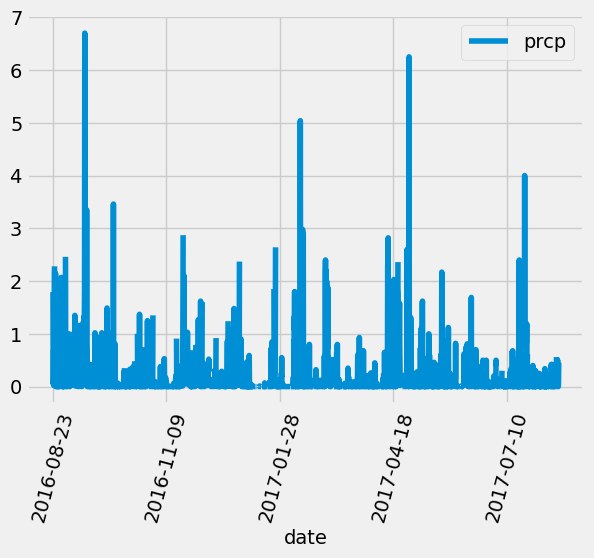

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year =dt.date(2017,8,23)-dt.timedelta(days=365)
prev_year 
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date>=prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_prcp=pd.DataFrame(results, columns=["date","prcp"])

# Sort the dataframe by date
dates=results_prcp.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
dates.plot("date","prcp",rot=75)

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
dates.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
numb_stations = session.query(func.count(station.station)).first()
print(f"There are {numb_stations[0]} of stations.")

There are 9 of stations.


In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
design = session.query(measurement.station, func.count(measurement.station))\
                 .group_by(measurement.station)\
                 .order_by(func.count(measurement.station).desc())\
                 .all()

print(design)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station,func.min(measurement.tobs),func.max(measurement.tobs))
most_active.all()

[('USC00519397', 53.0, 87.0)]

Text(0.5, 4.183333333333314, 'Temperature')

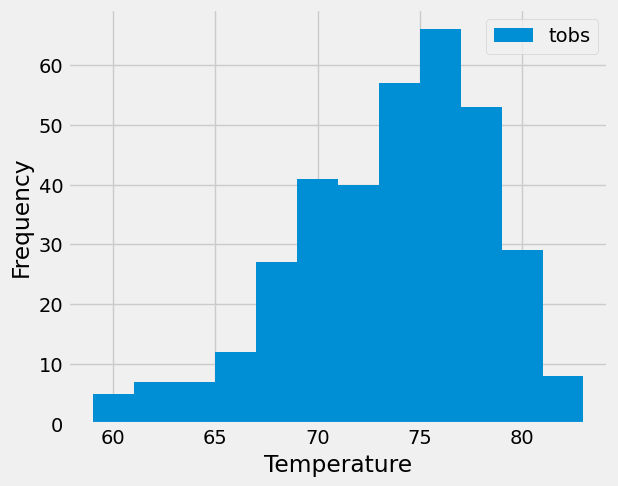

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_id = session.qeury(measurement.tobs).\


# Close Session

In [16]:
# Close Session
session.close()